In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
depression = pd.read_csv('sentiment_tweets3.csv')

In [3]:
depression

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [4]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
depression.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [6]:
depression.drop(['Index'],axis=1,inplace=True)

<Axes: xlabel='label (depression result)', ylabel='count'>

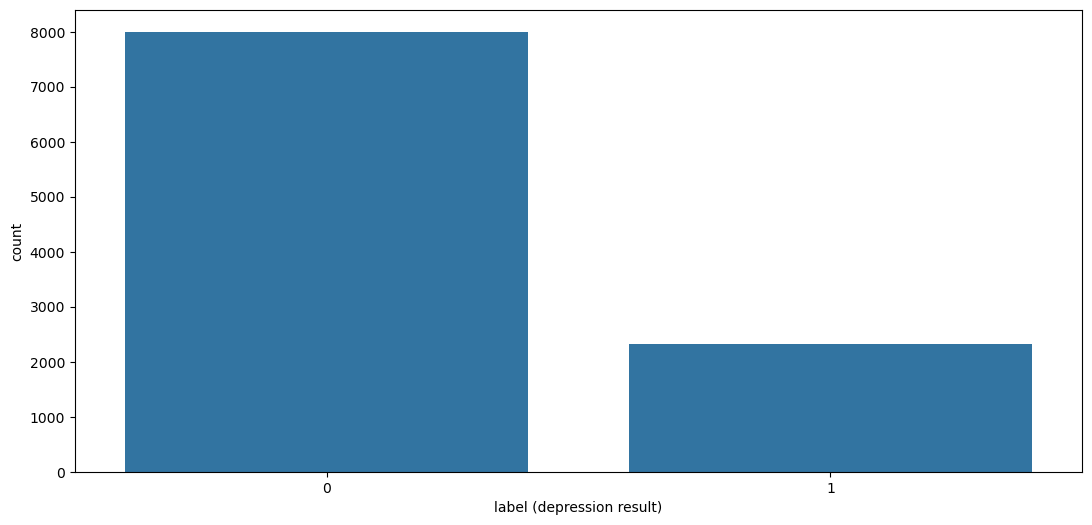

In [7]:
plt.figure(figsize=(13,6))
sns.countplot(data=depression,x='label (depression result)')

In [8]:
depression.head()

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [9]:
from nltk.stem.porter import PorterStemmer

harry_poter = PorterStemmer()

In [10]:
def convert_message(messagetoexamine):
    temp = []
    messagetoexamine = messagetoexamine.split()
    for word in messagetoexamine:
        word = harry_poter.stem(word)
        temp.append(word)
    return temp

In [63]:
depression['message to examine'].iloc[1]

'is read manga http://plurk.com/p/mzp1'

In [12]:
depression['message to examine'] = depression['message to examine'].apply(convert_message)

In [13]:
depression.head()

,message to examine,label (depression result)
0,"[just, had, a, real, good, moment., i, misssss...",0
1,"[is, read, manga, http://plurk.com/p/mzp1]",0
2,"[@comeagainjen, http://twitpic.com/2y2lx, -, h...",0
3,"[@lapcat, need, to, send, 'em, to, my, account...",0
4,"[add, me, on, myspace!!!, myspace.com/lookthund]",0


In [14]:
depression = depression.rename(columns={'label (depression result)': 'depression_result'})

In [15]:
depression

,message to examine,depression_result
0,"[just, had, a, real, good, moment., i, misssss...",0
1,"[is, read, manga, http://plurk.com/p/mzp1]",0
2,"[@comeagainjen, http://twitpic.com/2y2lx, -, h...",0
3,"[@lapcat, need, to, send, 'em, to, my, account...",0
4,"[add, me, on, myspace!!!, myspace.com/lookthund]",0
...,...,...
10309,"[no, depress, by, g, herbo, is, my, mood, from...",1
10310,"[what, do, you, do, when, depress, succumb, th...",1
10311,"[ketamin, nasal, spray, show, promis, against,...",1
10312,"[dont, mistak, a, bad, day, with, depression!,...",1


In [20]:
depression['message to examine'] = depression['message to examine'].apply(lambda tag: ' '.join(tag))

In [21]:
depression

,message to examine,depression_result
0,just had a real good moment. i missssssssss hi...,0
1,is read manga http://plurk.com/p/mzp1,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my account tomorro...,0
4,add me on myspace!!! myspace.com/lookthund,0
...,...,...
10309,"no depress by g herbo is my mood from now on, ...",1
10310,what do you do when depress succumb the brain ...,1
10311,ketamin nasal spray show promis against depres...,1
10312,dont mistak a bad day with depression! everyon...,1


In [23]:
# count vectorization - data convert into numeric data
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(max_features=300,stop_words='english')

In [24]:
count_vector.fit(depression['message to examine'])

CountVectorizer(max_features=300, stop_words='english')

In [25]:
arr = count_vector.transform(depression['message to examine']).toarray()

In [26]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
arr.shape

(10314, 300)

In [28]:
X = arr
Y = depression['depression_result']

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [30]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

naive_bayes = MultinomialNB()

In [31]:
naive_bayes.fit(X_train,Y_train)

MultinomialNB()

In [32]:
predictions = naive_bayes.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1579
           1       0.95      0.99      0.97       484

    accuracy                           0.98      2063
   macro avg       0.97      0.98      0.98      2063
weighted avg       0.98      0.98      0.98      2063



In [34]:
message_to_examine = 'just had a real good moment. i missssssssss him so much'
depression_result = 0

In [35]:
tag = [str(depression_result)] + message_to_examine.split()

In [36]:
tag

['0',
 'just',
 'had',
 'a',
 'real',
 'good',
 'moment.',
 'i',
 'missssssssss',
 'him',
 'so',
 'much']

In [37]:
tag = ' '.join(tag)

In [38]:
tag

'0 just had a real good moment. i missssssssss him so much'

In [39]:
tag = convert_message(tag)

In [40]:
tag

['0',
 'just',
 'had',
 'a',
 'real',
 'good',
 'moment.',
 'i',
 'missssssssss',
 'him',
 'so',
 'much']

In [44]:
tag = ' '.join(tag)

In [45]:
tag

'0 just had a real good moment. i missssssssss him so much'

In [46]:
tag = pd.Series(tag)

In [47]:
tag

0    0 just had a real good moment. i missssssssss ...
dtype: object

In [48]:
data = count_vector.transform(tag).toarray()

In [49]:
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
naive_bayes.predict(data)

array([0], dtype=int64)

In [57]:
text=' '.join(list(depression[depression['depression_result']==0]['message to examine']))

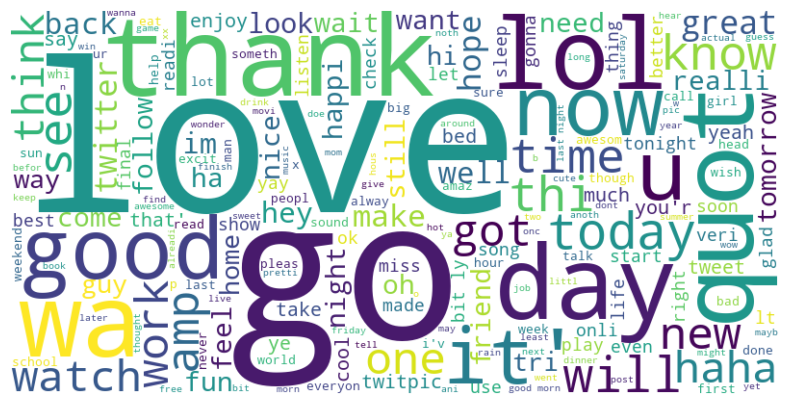

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') 
plt.show()

In [59]:
text=' '.join(list(depression[depression['depression_result']==1]['message to examine']))

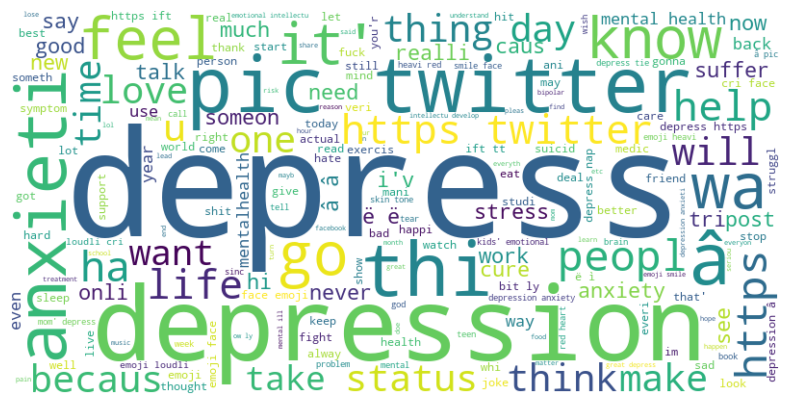

In [60]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') 
plt.show()